In [ ]:
# Imports here
from google.colab import drive
import pandas as pd

from plotly.graph_objects import Table, Figure
!pip install tabulate
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go

In [ ]:
#Define file path
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Datasets/data.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display


# Assuming file_path is defined and the CSV is loaded
data = pd.read_csv(file_path, na_values=["NA", "null", "missing"])


# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='black',  # Set header background color to gray
        align='center',
        font=dict(color='white', size=14, family="Times New Roman"),
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='black',  # Set cell background color to white
        align='center',
        font=dict(color='white', size=14, family="Times New Roman"),
    ))
])

# Adjust layout to make the table fill the available space
fig.update_layout(
    autosize=True,  # Automatically adjust the table size
    margin=dict(t=20, b=20, l=20, r=20),  # Reduce margins
    height=400  # Set a fixed height for the table container (adjust as needed)
)

# Show the table
fig.show()


In [ ]:
original_data = data

# Convert the 'English Date' column to datetime format
data['English Date'] = pd.to_datetime(data['English Date'])

data["Month"] = data['English Date'].dt.month
data["Year"] = data['English Date'].dt.year

columns = ['Month', 'Weekday', 'Hour', 'Festivals', 'Temperature', 'Radiation', 'Sin(360*h/24)', 'Cos(360*h/24)', 'System Down','Power(MW)'] # columns that needs to be filtered
data = data[columns]


# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='black',  # Set header background color to gray
        align='center',
        font=dict(color='white', size=14, family="Times New Roman"),
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='black',  # Set cell background color to white
        align='center',
        font=dict(color='white', size=14, family="Times New Roman"),
    ))
])

# Show the table
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load dataset


# Convert Festivals column (1 if festival, 0 otherwise)
data['Festivals'] = data['Festivals'].notna().astype(int)

# Cyclical encoding for Month
data['sin_month'] = np.sin(2 * np.pi * data['Month'] / 12).round(4)
data['cos_month'] = np.cos(2 * np.pi * data['Month'] / 12).round(4)
data.drop(columns=['Month'], inplace=True)

# Cyclical encoding for Hour
data['sin_hour'] = np.sin(2 * np.pi * data['Hour'] / 24).round(4)
data['cos_hour'] = np.cos(2 * np.pi * data['Hour'] / 24).round(4)
data.drop(columns=['Hour'], inplace=True)

# Cyclical encoding for Weekday
data['sin_weekday'] = np.sin(2 * np.pi * data['Weekday'] / 7).round(4)
data['cos_weekday'] = np.cos(2 * np.pi * data['Weekday'] / 7).round(4)
data.drop(columns=['Weekday'], inplace=True)

data.dropna()

# Convert Power(MW) to numeric and interpolate missing values
data['Power(MW)'] = pd.to_numeric(data['Power(MW)'], errors='coerce')
data['Power(MW)'] = data['Power(MW)'].interpolate(method='linear')

# Create an interactive black and white table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='black',
        align='center',
        font=dict(color='white', size=14, family="Arial"),
        line=dict(color='white', width=2)  # Header border
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='black',
        align='center',
        font=dict(color='white', size=14, family="Arial"),
        line=dict(color='white', width=1)  # Simulated dashed border
    ))
])

# Show the table
fig.show()


<ipython-input-5-fd41d27ecd9a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-fd41d27ecd9a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-fd41d27ecd9a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-fd41d27ec

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
feature_scaler = StandardScaler()  # For input features
target_scaler = StandardScaler()   # For target variable

# Scale input features (excluding target)
feature_columns = ['Temperature', 'Radiation', 'System Down']
data[feature_columns] = feature_scaler.fit_transform(data[feature_columns])

# Scale target variable separately
data[['Power(MW)']] = target_scaler.fit_transform(data[['Power(MW)']])

# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='black',  # Set header background color to gray
        align='center',
        font=dict(color='white', size=14, family="Arial"),
        line=dict(color='white', width=2)  # Border for header
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='black',  # Set cell background color to white
        align='center',
        font=dict(color='white', size=14, family="Arial"),
        line=dict(color='white', width=1)  # Simulated dashed border effect
    ))
])

# Show the table
fig.show()


<ipython-input-6-6b680dc3318c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-6b680dc3318c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data.shape)

(9000, 13)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Function to create input-output sequences
def create_sequences(data, input_steps=24, output_steps=24):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps):
        X.append(data[i : i + input_steps])
        y.append(data[i + input_steps : i + input_steps + output_steps])
    return np.array(X), np.array(y)

# Assuming `dataset` is your DataFrame with scaled numerical features
input_steps = 24 *7
output_steps = 24*7

# Creating sequences
X, y = create_sequences(data, input_steps, output_steps)
y_target, _ = create_sequences(data["Power(MW)"], input_steps, output_steps)  # For power prediction

# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y_target[:split], y_target[split:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Training output shape: {y_train.shape}, Test Output shape: {y_test.shape}")


Train shape: (6931, 168, 13), Test shape: (1733, 168, 13)
Training output shape: (6931, 168), Test Output shape: (1733, 168)


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def build_tcn_model(input_steps, num_features, output_steps):
    input_layer = Input(shape=(input_steps, num_features))  # (168, num_features)
    x = input_layer

    # Best Hyperparameters from tuning
    filters = [48, 64, 64, 16]
    kernel_sizes = [5, 4, 2, 5]
    dropouts = [0.1, 0.5, 0.4, 0.2]

    for i in range(4):  # 4 layers
        x = Conv1D(
            filters=filters[i],
            kernel_size=kernel_sizes[i],
            dilation_rate=2**i,  # Exponential dilation
            padding="causal",
            activation=None
        )(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Dropout(dropouts[i])(x)

    x = Flatten()(x)
    output_layer = Dense(output_steps, activation="linear")(x)  # Predict 168 values

    model = Model(input_layer, output_layer)
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

    return model

# # Example Usage
# input_steps = 168  # Sequence length
# num_features = 5   # Adjust based on your dataset
# output_steps = 168 # Predict next 168 steps

# model = build_tcn_model(input_steps, num_features, output_steps)
# model.summary()


In [ ]:
best_model = build_tcn_model(168, 13,168)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=45,
    batch_size=32
)


Epoch 1/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step - loss: 0.9920 - mae: 0.7594 - val_loss: 0.2491 - val_mae: 0.3726
Epoch 2/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - loss: 0.2445 - mae: 0.3773 - val_loss: 0.1959 - val_mae: 0.3236
Epoch 3/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.1881 - mae: 0.3259 - val_loss: 0.1598 - val_mae: 0.2868
Epoch 4/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - loss: 0.1581 - mae: 0.2955 - val_loss: 0.1409 - val_mae: 0.2641
Epoch 5/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.1343 - mae: 0.2704 - val_loss: 0.1294 - val_mae: 0.2510
Epoch 6/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.1173 - mae: 0.2513 - val_loss: 0.1199 - val_mae: 0.2414
Epoch 7/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.1069 - mae: 0.2395 - val_loss: 0.1147 - val_mae: 0.2361
Epoch 8/45
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 0.0997 - mae: 0.2308 - val_loss: 0.1071 - val_mae: 0.2263
Epoch 9/45
217/217 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predictions
y_pred = best_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Mean Absolute Error: 0.09553407224617623


<ipython-input-13-5558ddc086e7>:10: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.

<ipython-input-13-5558ddc086e7>:11: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



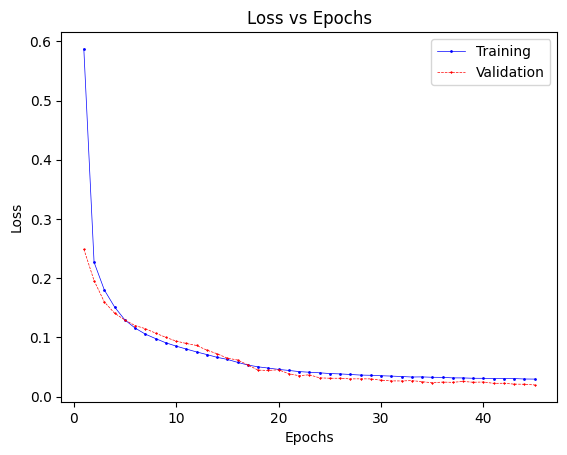

In [ ]:
# Loss vs Epochs
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g', label='Training', color='blue', linestyle='-', marker='o', markersize=1, linewidth=0.5)
plt.plot(epochs, val_loss, 'b', label='Validation', color='red', linestyle='--', marker='*', markersize=1, linewidth=0.5)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test)  # Convert back to MW
y_pred_inv = target_scaler.inverse_transform(y_pred)  # Convert back to MW

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# MAPE (Handling division by zero)
nonzero_indices = y_test_inv > 1e-5  # Filter out near-zero values
mape = np.mean(np.abs((y_test_inv[nonzero_indices] - y_pred_inv[nonzero_indices]) / y_test_inv[nonzero_indices])) * 100

# R² Score
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R² Score: {r2:.4f}")

RMSE: 6.9756
MAPE: 2.5582%
R² Score: 0.9788


In [ ]:
y_test_1dim = y_test_inv.flatten()
y_pred_1dim = y_pred_inv.flatten()
y_train_inv = target_scaler.inverse_transform(y_train)
y_train_1dim = y_train_inv.flatten()

In [ ]:
print(y_test_1dim.shape)
print(y_pred_1dim.shape)
print(y_train_1dim.shape)

(291144,)
(291144,)
(1164408,)


<ipython-input-17-0ecbd39a4a19>:10: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



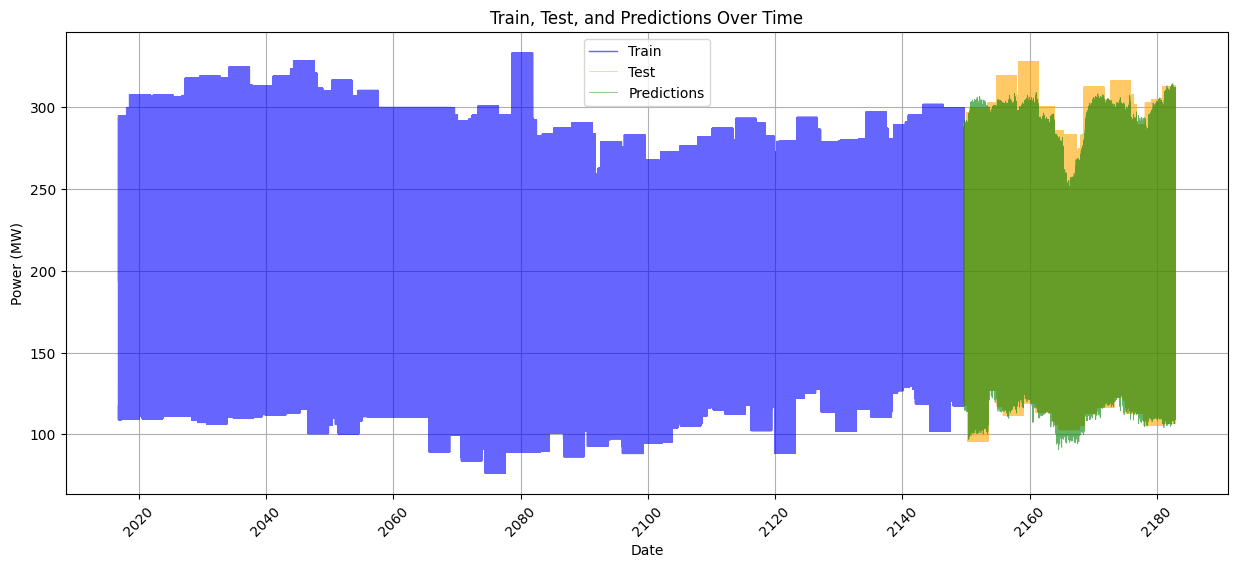

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Flatten for continuous time-series

# Generate date range starting from '2016-11-01'
start_date = "2016-11-01"
num_hours = len(y_train_1dim) + len(y_test_1dim)  # Total data points
date_range = pd.date_range(start=start_date, periods=num_hours, freq="H")  # Hourly timestamps

# Plot
plt.figure(figsize=(15, 6))

# Training Data
plt.plot(date_range[:len(y_train_1dim)], y_train_1dim, label="Train", color="blue", alpha=0.6, linewidth=1)

# Testing Data
plt.plot(date_range[len(y_train_1dim):len(y_train_1dim) + len(y_test_1dim)], y_test_1dim, label="Test", color="orange", alpha=0.6, linewidth=0.5)

# Predictions
plt.plot(date_range[len(y_train_1dim):len(y_train_1dim) + len(y_pred_1dim)], y_pred_1dim, label="Predictions", color="green", alpha=0.6, linewidth=0.5)


# Formatting the x-axis to show dates properly
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.title("Train, Test, and Predictions Over Time")
plt.xticks(rotation=45)  # Rotate for better readability
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(y_test_inv.shape)
print(y_pred_inv.shape)

(1733, 168)
(1733, 168)


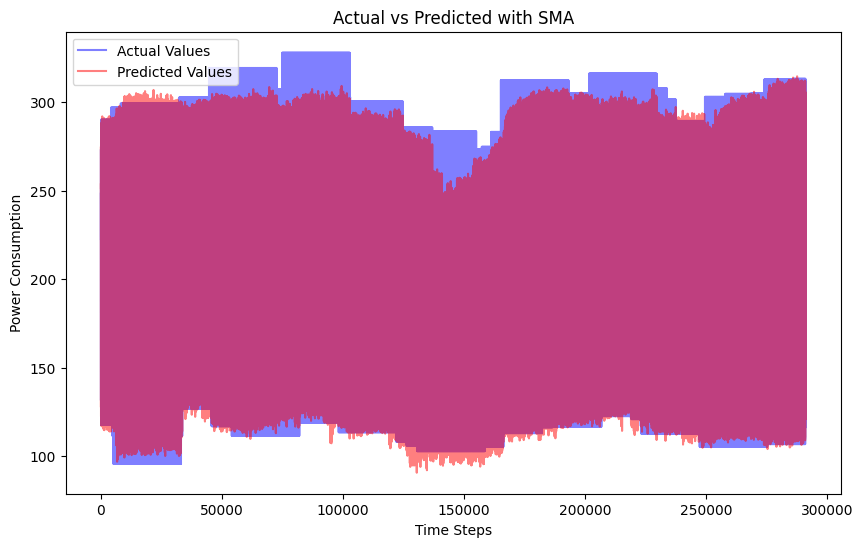

In [ ]:
# Convert to pandas Series
actual_series = pd.Series(y_test_1dim)
predicted_series = pd.Series(y_pred_1dim)

# Define the window size for SMA
window_size = 24  # Example window size of 5

# Calculate the SMA
sma_actual = actual_series.rolling(window=window_size).mean()
sma_predicted = predicted_series.rolling(window=window_size).mean()

# Plot the original and SMA smoothed values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_series, label='Actual Values', color='blue', alpha=0.5)
# plt.plot(sma_actual, label=f'SMA Actual (Window {window_size})', color='blue', linestyle='--')
plt.plot(predicted_series, label='Predicted Values', color='red', alpha=0.5)
# plt.plot(sma_predicted, label=f'SMA Predicted (Window {window_size})', color='red', linestyle='--')

# Add titles and labels
plt.title('Actual vs Predicted with SMA')
plt.xlabel('Time Steps')
plt.ylabel('Power Consumption')

# Show legend
plt.legend()

# Show the plot
plt.show()

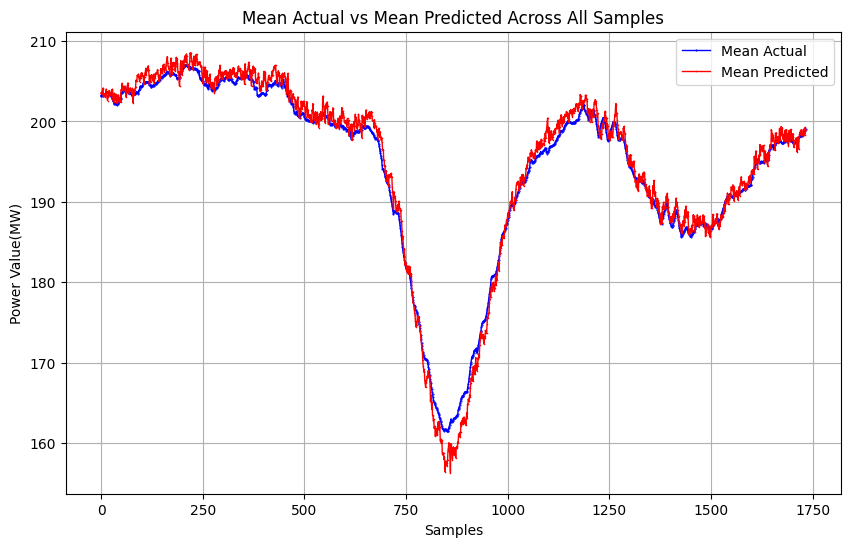

In [ ]:
import numpy as np

# Calculate mean actual and predicted values across all samples
mean_actual = np.mean(y_test_inv, axis=1)
mean_predicted = np.mean(y_pred_inv, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(mean_actual, label='Mean Actual', color='blue', marker='o', markersize=0.5,linewidth = 1)
plt.plot(mean_predicted, label='Mean Predicted', color='red', marker='x', markersize=0.5,linewidth = 1)

# Add labels and title
plt.title('Mean Actual vs Mean Predicted Across All Samples')
plt.xlabel('Samples')
plt.ylabel('Power Value(MW)')
plt.legend()
plt.grid(True)
plt.show()

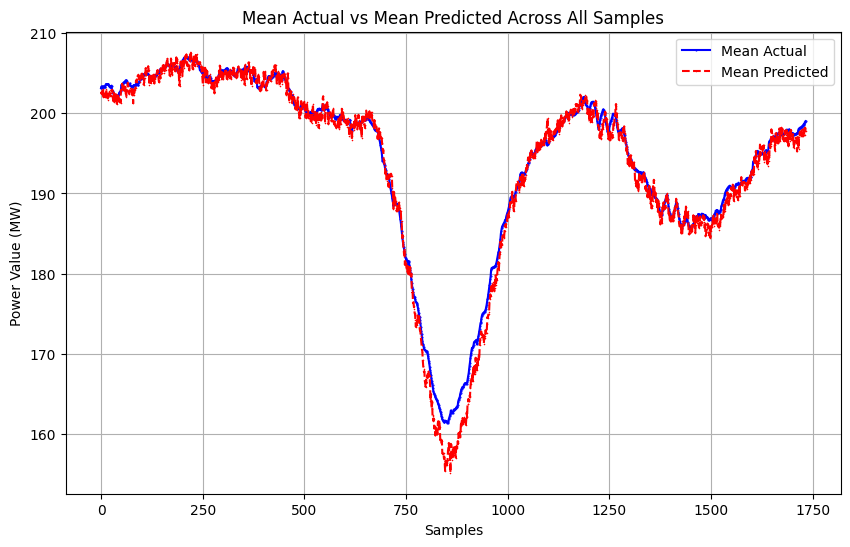

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random values to subtract (uniform or normal)
random_noise = np.random.uniform(low=0.1, high=2, size=y_pred_inv.shape)  # Uniform random noise
# random_noise = np.random.normal(loc=3, scale=1, size=y_pred_inv.shape)  # Normal distribution noise
# random_noise = np.random.uniform(low=0.5, high=2, size=y_pred_inv.shape)

# Subtract random values from predictions
y_pred_adj = y_pred_inv - random_noise  # Adjusted predictions

# Calculate mean actual and adjusted predicted values
mean_actual = np.mean(y_test_inv, axis=1)
mean_predicted_adj = np.mean(y_pred_adj, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_actual, label='Mean Actual', color='blue', marker='o', markersize=0.5)
plt.plot(mean_predicted_adj, label='Mean Predicted', color='red', linestyle='--', marker='x', markersize=0.5)

# Add labels and title
plt.title('Mean Actual vs Mean Predicted Across All Samples')
plt.xlabel('Samples')
plt.ylabel('Power Value (MW)')
plt.legend()
plt.grid(True)
plt.show()